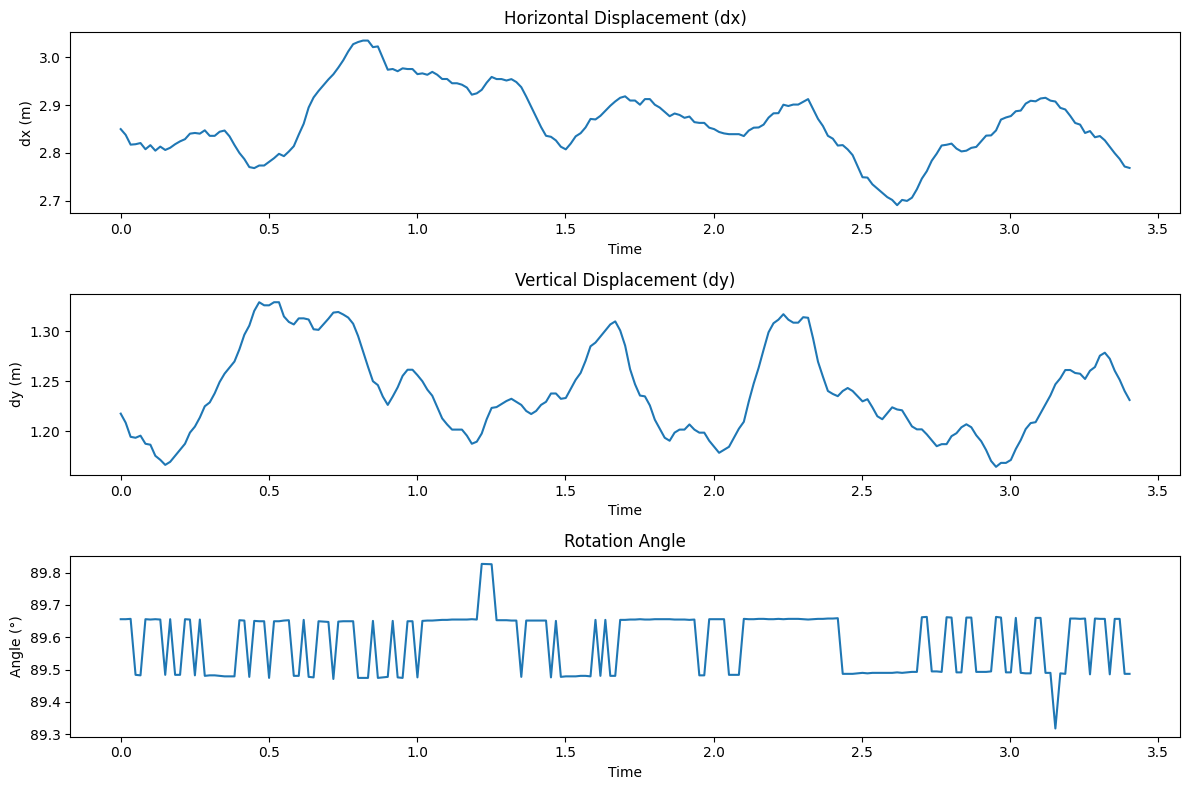

In [1]:
import json
import matplotlib.pyplot as plt

# Read the camera movement data from the JSON file
# with open("camera_movement_data.txt", "r") as f:
with open("rescale_crop_fps10_DJI_0047_camera_movement_data.txt", "r") as f:
    camera_movement_data = json.load(f)
    

# Separate the dx, dy, and angle data
dx_data, dy_data, angle_data = [], [], []
for data in camera_movement_data:
    dx_data.append(data[0])
    dy_data.append(data[1])
    angle_data.append(data[2])

# Create a time variable for the x-axis
frame_rate = 59.940
time = [t / frame_rate for t in range(len(dx_data))]

# Plot the shakiness data
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, dx_data)
plt.xlabel("Time")
plt.ylabel("dx (m)")
plt.title("Horizontal Displacement (dx)")

plt.subplot(3, 1, 2)
plt.plot(time, dy_data)
plt.xlabel("Time")
plt.ylabel("dy (m)")
plt.title("Vertical Displacement (dy)")

plt.subplot(3, 1, 3)
plt.plot(time, angle_data)
plt.xlabel("Time")
plt.ylabel("Angle (°)")
plt.title("Rotation Angle")

plt.tight_layout()
plt.show()


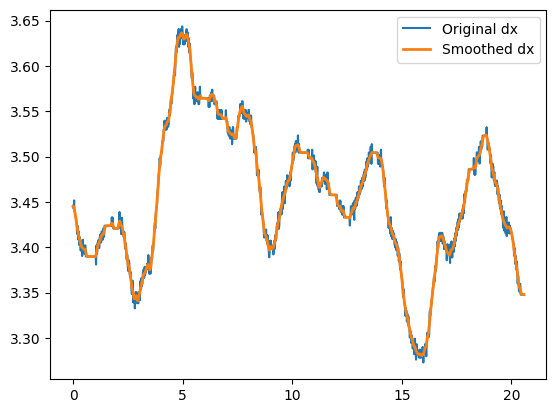

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Generate some noisy data
x = time
y = dx_data

# Apply Gaussian smoothing
sigma = 2  # Standard deviation for Gaussian kernel
smoothed_y = gaussian_filter1d(y, sigma)

# Plot the original and smoothed data
plt.figure()
plt.plot(x, y, label='Original dx')
plt.plot(x, smoothed_y, label='Smoothed dx', linewidth=2)
plt.legend()
plt.show()


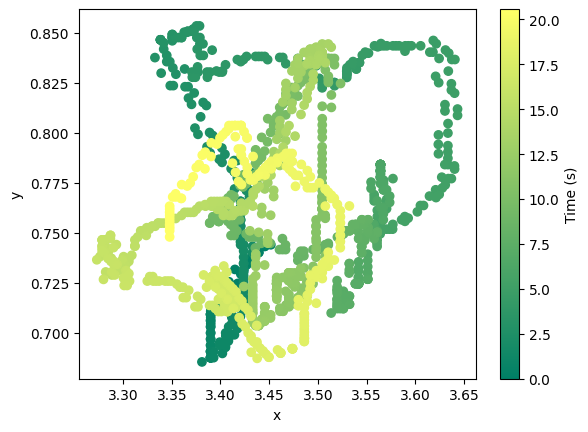

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming dx_data, dy_data, and time are defined
dx_data = np.array(dx_data)
dy_data = np.array(dy_data)
time = np.array(time)

# Create a scatter plot with colored points based on time
plt.scatter(dx_data, dy_data, c=time, cmap='summer')

# Add colorbar to show the color-to-time mapping
cbar = plt.colorbar()
cbar.ax.set_ylabel('Time (s)')

plt.xlabel("x")
plt.ylabel("y")

plt.show()


In [17]:
import numpy as np
from PIL import Image, ImageDraw
import imageio

def create_gif(dx_data, dy_data, output_file, scale=0.1):
    trajectory_points = np.column_stack((np.cumsum(dx_data), np.cumsum(dy_data)))

    min_x, min_y = np.min(trajectory_points, axis=0)
    max_x, max_y = np.max(trajectory_points, axis=0)

    width = int((max_x - min_x) * scale)
    height = int((max_y - min_y) * scale)
    
    print(f"Width: {width}, Height: {height}")
    img = Image.new('RGB', (width, height), color='white')


    images = []

    for i, (dx, dy) in enumerate(trajectory_points):
        img = Image.new('RGB', (width, height), color='white')
        draw = ImageDraw.Draw(img)

        x, y = int((dx - min_x) * scale), int((dy - min_y) * scale)
        draw.ellipse([x - 5, y - 5, x + 5, y + 5], fill='blue', outline='blue')
        
        if i > 0:
            prev_x, prev_y = int((trajectory_points[i-1, 0] - min_x) * scale), int((trajectory_points[i-1, 1] - min_y) * scale)
            draw.line([prev_x, prev_y, x, y], fill='blue', width=2)

        images.append(img)

    imageio.mimsave(output_file, [np.array(img) for img in images], format='GIF', duration=0.1)

# Example usage
output_file = "drone_trajectory.gif"
create_gif(dx_data, dy_data, output_file)


Width: 425, Height: 94
